# HW1 for Statistics with Meteorological Application
---
Student: 林之然 (B11209005, 大氣二), 蔡知諺（B11209014, 大氣二）

## a. Reproduction of the monthly TS plots in the class slide

### a.1. Import packages and open file

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import norm

# Load the data
file_path = 'TS.txt'
data = pd.read_csv(file_path, header=None, names=['Value'])
data['Time'] = pd.date_range(start='2020-01-01', periods=len(data), freq='M')
data.set_index('Time', inplace=True)

### a.2. Plot oringinal data with different bin-size

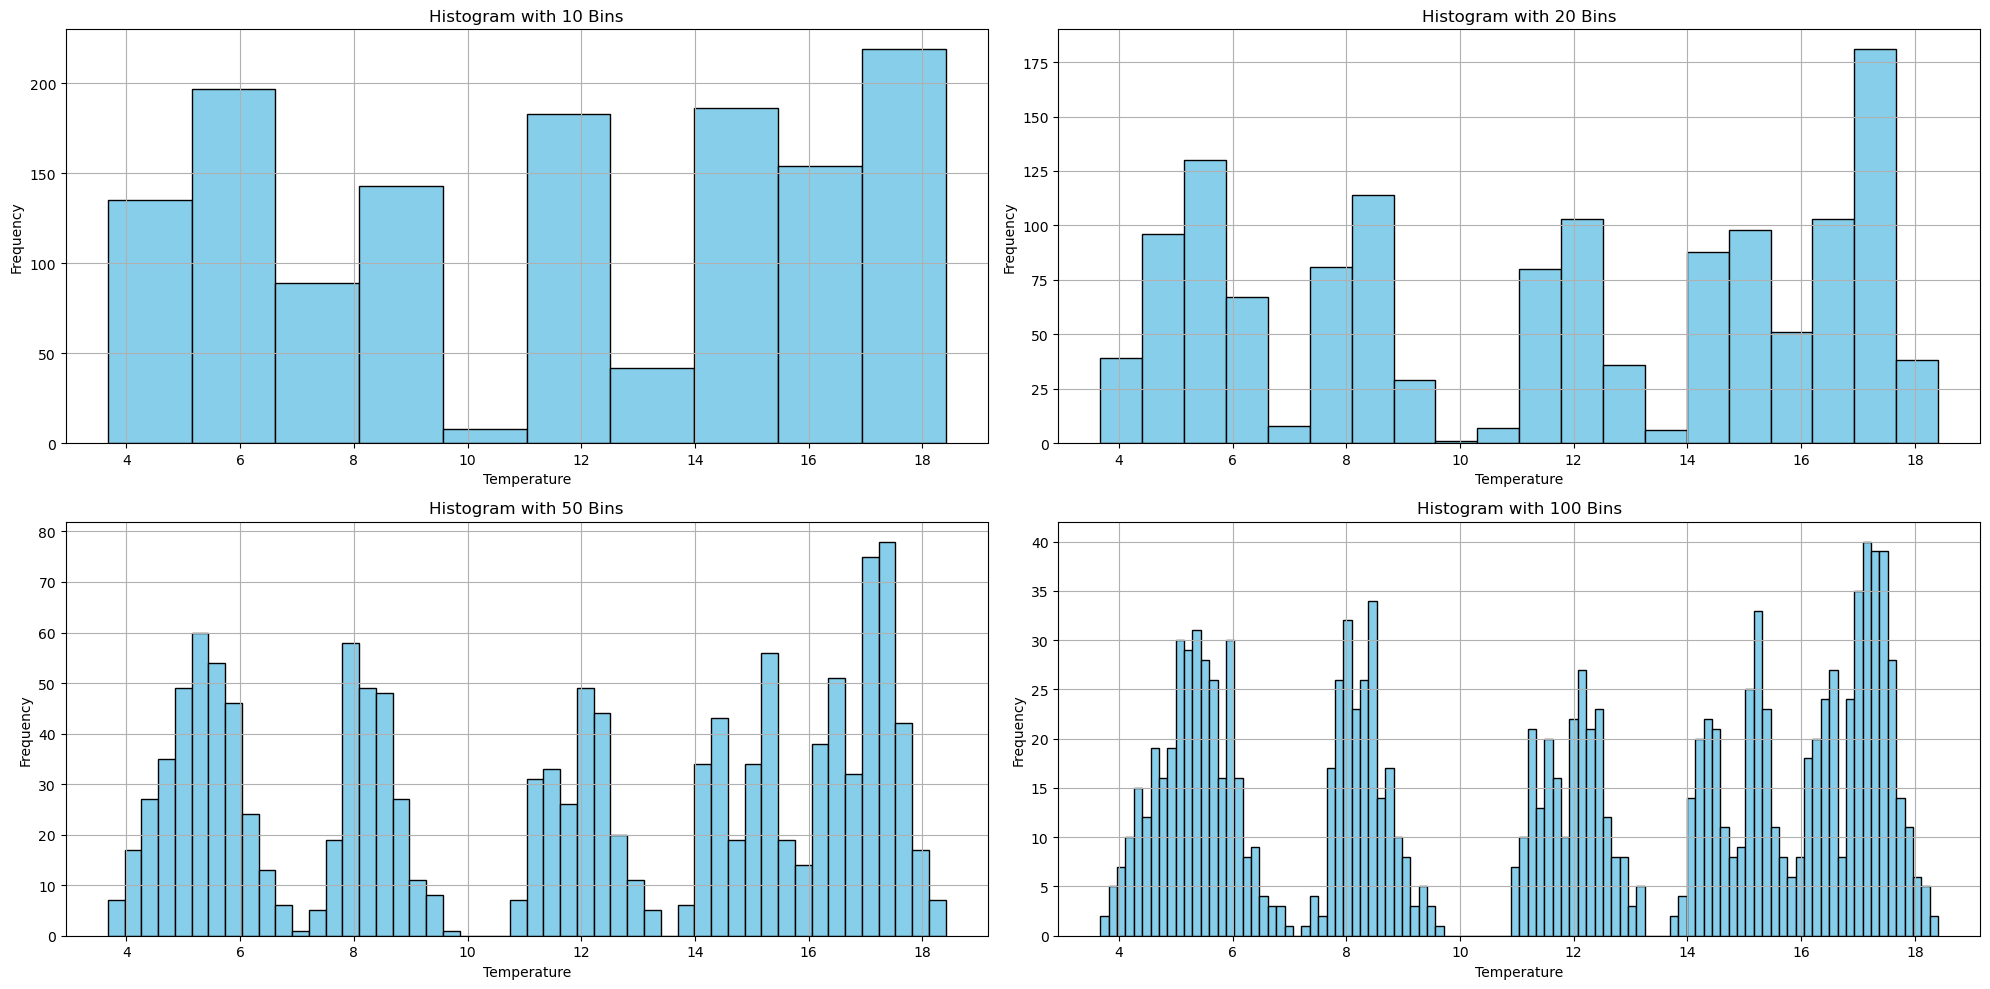

In [43]:
# Plotting histograms with different bin sizes for the original data
bin_sizes = [10, 20, 50, 100]

plt.figure(figsize=(20, 10))
for i, bins in enumerate(bin_sizes, 1):
    plt.subplot(2, 2, i, )
    plt.hist(data['Value'], bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram with {bins} Bins')
    plt.xlabel('Temperature')
    plt.ylabel('Frequency')
    plt.grid()
plt.tight_layout()
plt.show()

### a.3. Plot the deseasonalized data

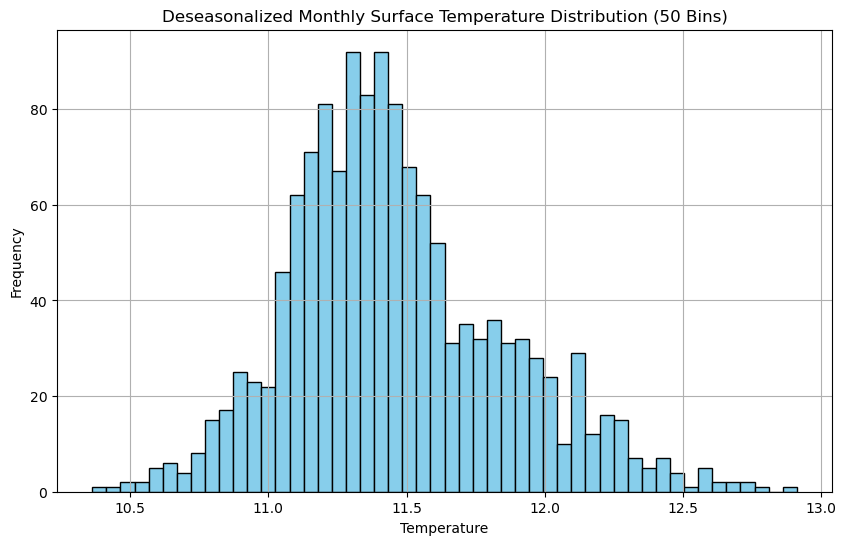

In [44]:
# Decomposition with a monthly period for surface temperature data
decomposition_result_monthly = seasonal_decompose(data['Value'], model='additive', period=12)
data['Deseasonalized_Monthly'] = data['Value'] - decomposition_result_monthly.seasonal

# Plotting the deseasonalized data histogram with the original bin size
plt.figure(figsize=(10, 6))
plt.hist(data['Deseasonalized_Monthly'], bins=50, color='skyblue', edgecolor='black')
plt.title('Deseasonalized Monthly Surface Temperature Distribution (50 Bins)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#### a.3.1. Adding fitting curve and deduct the mean value

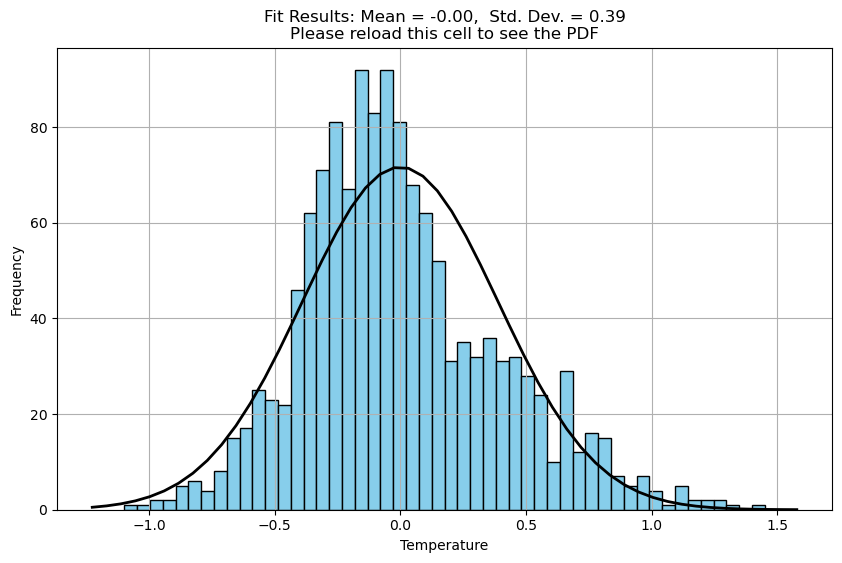

In [46]:
# Calculating the mean and standard deviation of the deseasonalized data for the normal distribution fit
mu, std = norm.fit(data['Deseasonalized_Monthly'])

# Plotting the histogram of the deseasonalized data again
plt.figure(figsize=(10, 6))
data['Deseasonalized_Monthly'] -= data['Deseasonalized_Monthly'].mean()
n, bins, patches = plt.hist(data['Deseasonalized_Monthly'], bins=50, color='skyblue', edgecolor='black')

# Adding a fitting curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
p = norm.pdf(x, mu, std) * 70
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Results: Mean = %.2f,  Std. Dev. = %.2f" % (mu, std)
plt.title(title+"\nPlease reload this cell to see the PDF")
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### a.4. Discussion

The results from the histogram analysis of the monthly surface temperature data, both before and after removing the seasonal cycle, reveal several key insights into the temperature distribution and its variability. Here's a detailed explanation of the findings:

### Original Data Histograms with Different Bin Sizes

- **Variability with Seasonality**: The histograms of the original data with varying bin sizes showcase how temperature distributions are influenced by seasons. With fewer bins, the distribution appears more generalized, potentially obscuring some of the finer details but highlighting the broader temperature ranges. As the number of bins increases, the seasonal effects become more pronounced, with clearer distinctions between the warmer and cooler periods of the year.
- **Seasonal Patterns**: The appearance of multiple peaks in histograms with more bins reflects the cyclical nature of temperature changes over the months. These peaks correspond to the seasonal variation, with higher temperatures typically observed in the summer months and lower temperatures in the winter months for temperate regions. The distribution's shape can reveal how temperatures cluster around certain times of the year, indicating the strength and duration of different seasons.
    - It's worth to mention that the four (or five) peaks don't exactly correspond to the four seasons, instead, (in the discussion with other classmates) we found that the central 3 groups has spring and fall signals mixed together. 

### Deseasonalized Data Histogram

- **Uniformity and Shift**: The deseasonalized histogram shows a distribution of temperatures with the seasonal influence removed. This process aims to highlight the underlying temperature trends without the regular ups and downs caused by seasonal changes. Since the seasonal signal is removed, we can better visualize the variability in a normal-distribution-like graph.
- **Distribution Shape**: As we remove the seasonal signal, the shape of the distribution tells more detailed variability. This smoother distribution helps in identifying other factors that might influence temperature variations over time, such as long-term climate change or other non-seasonal effects.

### Further Thinking
- The distribution of the spring/fall data and the blank intervals between data groups trigger our interests. It's interesting that the data before removing seasonal cycle is not evenly distributed. We suggest that the separation into several groups is associated with internal variabilities such as ENSO, Interdecadal Pacific Variability(IPV), Atlantic Multidecadal Variability(AMV), etc. (thanks to Prof. Yu-Chiao's class).

## b. 為什麼比起數據，人們更容易相信個案？
這篇文章探討了為什麼人們往往會對個案故事比對廣泛數據或科學證據更加敏感和易於接受。文章透過實驗證明，即使在面對具有高成功率的藥物時，一個負面的個案故事足以顯著降低人們的接受度；反之，一個正面的個案故事則能大幅提高低成功率藥物的接受度。這種現象揭示了人們天生傾向於依賴直觀和個人經歷來做出決策，而不是冷靜分析抽象的統計資料。文章強調了提高科學素養和批判性思維能力的重要性，指出透過教育和學習來增強理性思考，能幫助人們做出更加合理和客觀的決策。此外，它也建議在試圖說服他人時，結合理性與感性的策略可能更為有效。